# Sales Forecasting for a Retail Chain

### Focus Areas:

Data Analysis (EDA)

SQL Queries (Data Extraction/Manipulation)

Regression Modeling

(Optional) Time Series Forecasting

Visualization (Matplotlib / Seaborn / Power BI / Tableau / Streamlit)

Predict future sales for a retail chain based on historical data.
You’ll perform Exploratory Data Analysis (EDA) to uncover patterns such as seasonal sales trends, top-performing stores, and peak sales months.
Then, build a regression model (or time series model) to forecast future sales and present insights via a dashboard or interactive app.

# Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# df = pd.read_csv(r'./sales_forecasting_dataset_SmartEd_Project.csv')
df = pd.read_csv('https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/sales_forecasting_dataset_SmartEd_Project.csv')

In [22]:
df

,Date,Store_ID,Product_ID,Daily_Sale,Promotion,Holiday,Revenue,Store_Size,Store_Location_Type,Day_of_Week,Year,Total_Daily_Revenue
0,2023-04-07,2,105,233,0,0,10653.89,Medium,Urban,Friday,2023,12207.81
1,2023-02-10,5,103,384,0,1,10774.57,Medium,Suburban,Friday,2023,11019.80
2,2023-02-16,5,104,360,0,1,4642.82,Medium,Rural,Thursday,2023,3992.35
3,2023-01-26,4,104,478,1,0,7065.82,Small,Suburban,Thursday,2023,7169.85
4,2023-02-13,3,104,52,1,0,2163.91,Large,Rural,Monday,2023,2398.38
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-03-19,4,103,414,0,0,16240.96,Small,Rural,Sunday,2023,13575.75
996,2023-03-10,4,101,379,0,1,11511.81,Small,Urban,Friday,2023,13679.94
997,2023-03-07,4,103,414,0,0,19575.58,Medium,Rural,Tuesday,2023,20962.48
998,2023-02-27,2,103,71,1,1,2615.68,Medium,Urban,Monday,2023,3007.63


# Data Manipulation and Analysis

In [23]:
df.head()

,Date,Store_ID,Product_ID,Daily_Sale,Promotion,Holiday,Revenue,Store_Size,Store_Location_Type,Day_of_Week,Year,Total_Daily_Revenue
0,2023-04-07,2,105,233,0,0,10653.89,Medium,Urban,Friday,2023,12207.81
1,2023-02-10,5,103,384,0,1,10774.57,Medium,Suburban,Friday,2023,11019.80
2,2023-02-16,5,104,360,0,1,4642.82,Medium,Rural,Thursday,2023,3992.35
3,2023-01-26,4,104,478,1,0,7065.82,Small,Suburban,Thursday,2023,7169.85
4,2023-02-13,3,104,52,1,0,2163.91,Large,Rural,Monday,2023,2398.38


### Check For Missing Values and Duplicates

In [24]:
df.isnull().sum()

Date                   0
Store_ID               0
Product_ID             0
Daily_Sale             0
Promotion              0
Holiday                0
Revenue                0
Store_Size             0
Store_Location_Type    0
Day_of_Week            0
Year                   0
Total_Daily_Revenue    0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

Data is clean and ready for analysis.

## Data Transformation & Feature Engineering

In [26]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:")
print(df.dtypes)
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (1000, 12)

Column Data Types:
Date                    object
Store_ID                 int64
Product_ID               int64
Daily_Sale               int64
Promotion                int64
Holiday                  int64
Revenue                float64
Store_Size              object
Store_Location_Type     object
Day_of_Week             object
Year                     int64
Total_Daily_Revenue    float64
dtype: object

Basic Statistics:
          Store_ID   Product_ID  Daily_Sale    Promotion      Holiday  \
count  1000.000000  1000.000000  1000.00000  1000.000000  1000.000000   
mean      2.933000   102.965000   276.35500     0.504000     0.512000   
std       1.415809     1.392017   132.28365     0.500234     0.500106   
min       1.000000   101.000000    50.00000     0.000000     0.000000   
25%       2.000000   102.000000   165.00000     0.000000     0.000000   
50%       3.000000   103.000000   276.00000     1.000000     1.000000   
75%       4.000000   104.000000   393.

In [27]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract additional time-based features
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.quarter
df['Week_of_Year'] = df['Date'].dt.isocalendar().week
df['Day_of_Month'] = df['Date'].dt.day
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday']).astype(int)

# Create a Season column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

print("New features added successfully!")
print("\nUpdated DataFrame shape:", df.shape)
df.head()

New features added successfully!

Updated DataFrame shape: (1000, 19)


,Date,Store_ID,Product_ID,Daily_Sale,Promotion,Holiday,Revenue,Store_Size,Store_Location_Type,Day_of_Week,Year,Total_Daily_Revenue,Month,Month_Name,Quarter,Week_of_Year,Day_of_Month,Is_Weekend,Season
0,2023-04-07,2,105,233,0,0,10653.89,Medium,Urban,Friday,2023,12207.81,4,April,2,14,7,0,Spring
1,2023-02-10,5,103,384,0,1,10774.57,Medium,Suburban,Friday,2023,11019.80,2,February,1,6,10,0,Winter
2,2023-02-16,5,104,360,0,1,4642.82,Medium,Rural,Thursday,2023,3992.35,2,February,1,7,16,0,Winter
3,2023-01-26,4,104,478,1,0,7065.82,Small,Suburban,Thursday,2023,7169.85,1,January,1,4,26,0,Winter
4,2023-02-13,3,104,52,1,0,2163.91,Large,Rural,Monday,2023,2398.38,2,February,1,7,13,0,Winter


## Exploratory Data Analysis (EDA)

### Sales Distribution Analysis

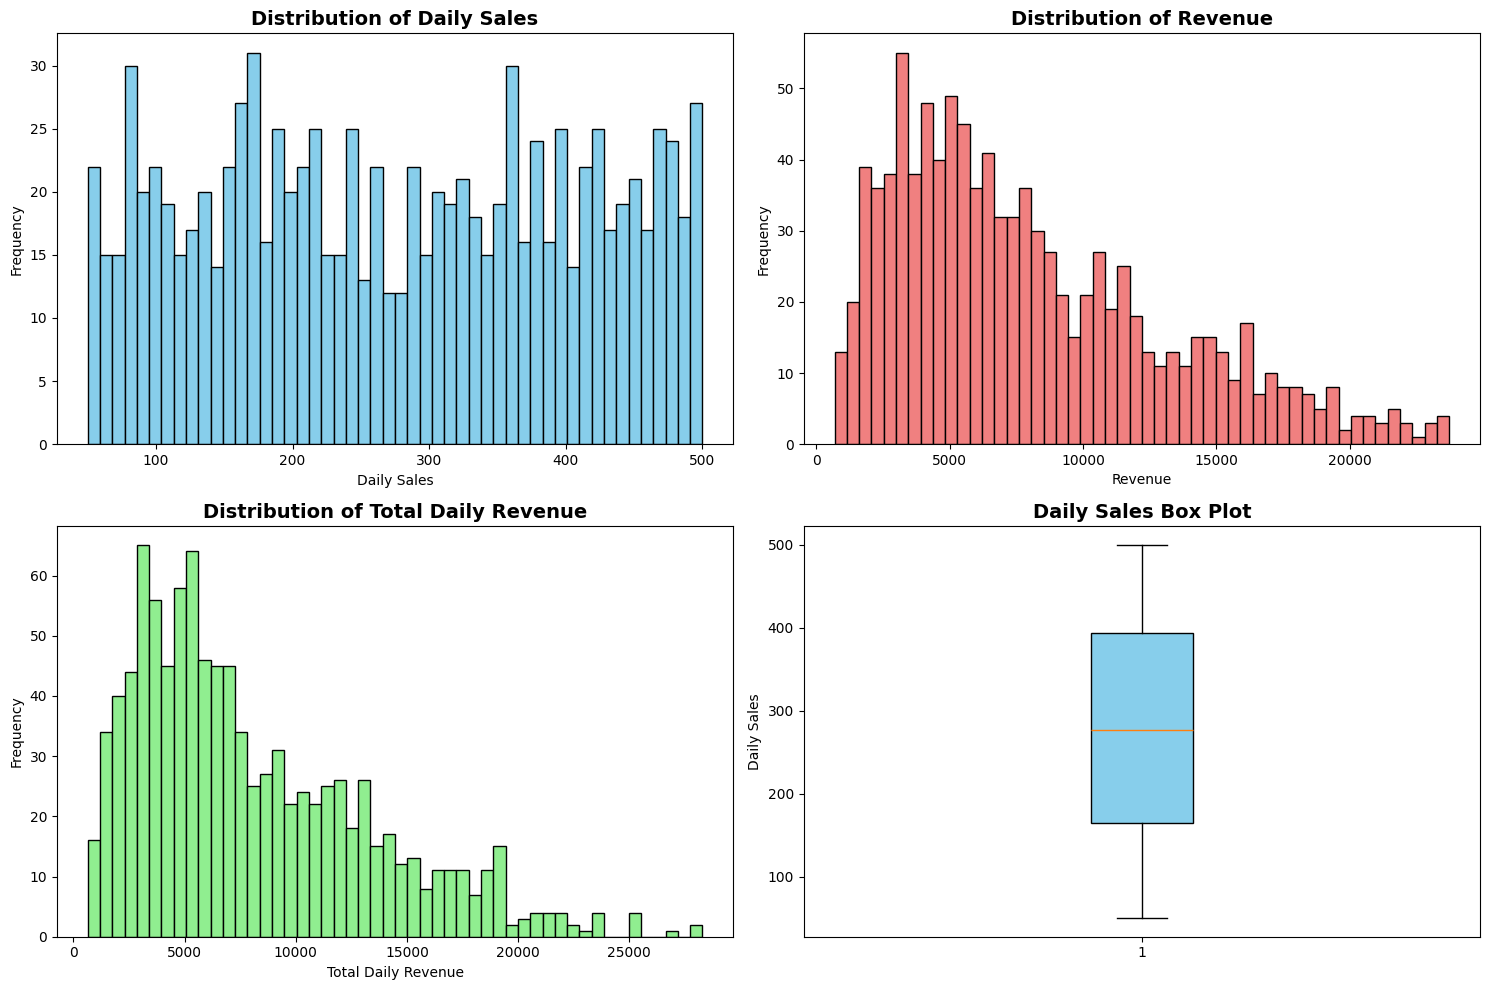

In [28]:
# Distribution of Daily Sales
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Daily Sales Distribution
axes[0, 0].hist(df['Daily_Sale'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Daily Sales', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Daily Sales')
axes[0, 0].set_ylabel('Frequency')

# Revenue Distribution
axes[0, 1].hist(df['Revenue'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Revenue', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Revenue')
axes[0, 1].set_ylabel('Frequency')

# Total Daily Revenue Distribution
axes[1, 0].hist(df['Total_Daily_Revenue'], bins=50, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribution of Total Daily Revenue', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Total Daily Revenue')
axes[1, 0].set_ylabel('Frequency')

# Box plot for Daily Sales
axes[1, 1].boxplot(df['Daily_Sale'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='skyblue'))
axes[1, 1].set_title('Daily Sales Box Plot', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Daily Sales')

plt.tight_layout()
plt.show()

### Time Series Analysis

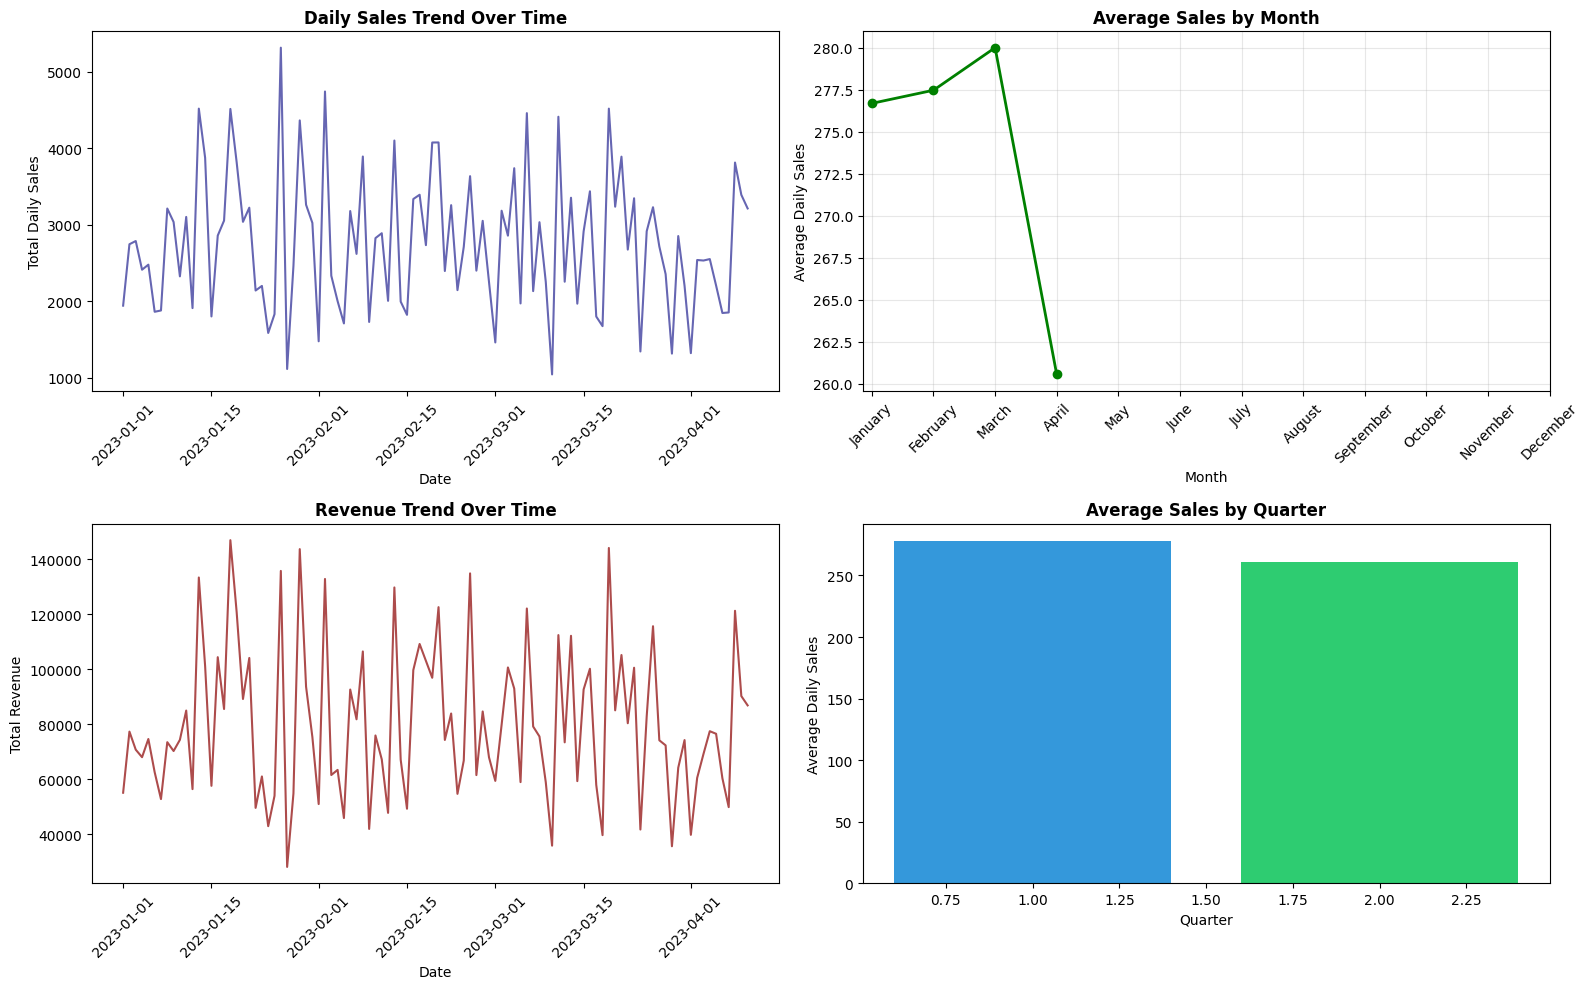

In [30]:
# Sales trends over time
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Daily sales trend
daily_trend = df.groupby('Date')['Daily_Sale'].sum().reset_index()
axes[0, 0].plot(daily_trend['Date'], daily_trend['Daily_Sale'], color='navy', alpha=0.6)
axes[0, 0].set_title('Daily Sales Trend Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Total Daily Sales')
axes[0, 0].tick_params(axis='x', rotation=45)

# Monthly sales trend
monthly_trend = df.groupby('Month_Name')['Daily_Sale'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December'])
axes[0, 1].plot(range(len(monthly_trend)), monthly_trend.values, marker='o', color='green', linewidth=2)
axes[0, 1].set_title('Average Sales by Month', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Daily Sales')
axes[0, 1].set_xticks(range(len(monthly_trend)))
axes[0, 1].set_xticklabels(monthly_trend.index, rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Revenue trend over time
revenue_trend = df.groupby('Date')['Revenue'].sum().reset_index()
axes[1, 0].plot(revenue_trend['Date'], revenue_trend['Revenue'], color='darkred', alpha=0.7)
axes[1, 0].set_title('Revenue Trend Over Time', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Total Revenue')
axes[1, 0].tick_params(axis='x', rotation=45)

# Quarterly comparison
quarterly_sales = df.groupby('Quarter')['Daily_Sale'].mean()
axes[1, 1].bar(quarterly_sales.index, quarterly_sales.values, color=['#3498DB', '#2ECC71', '#F39C12', '#E74C3C'])
axes[1, 1].set_title('Average Sales by Quarter', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Quarter')
axes[1, 1].set_ylabel('Average Daily Sales')

plt.tight_layout()
plt.show()

### Correlation Analysis

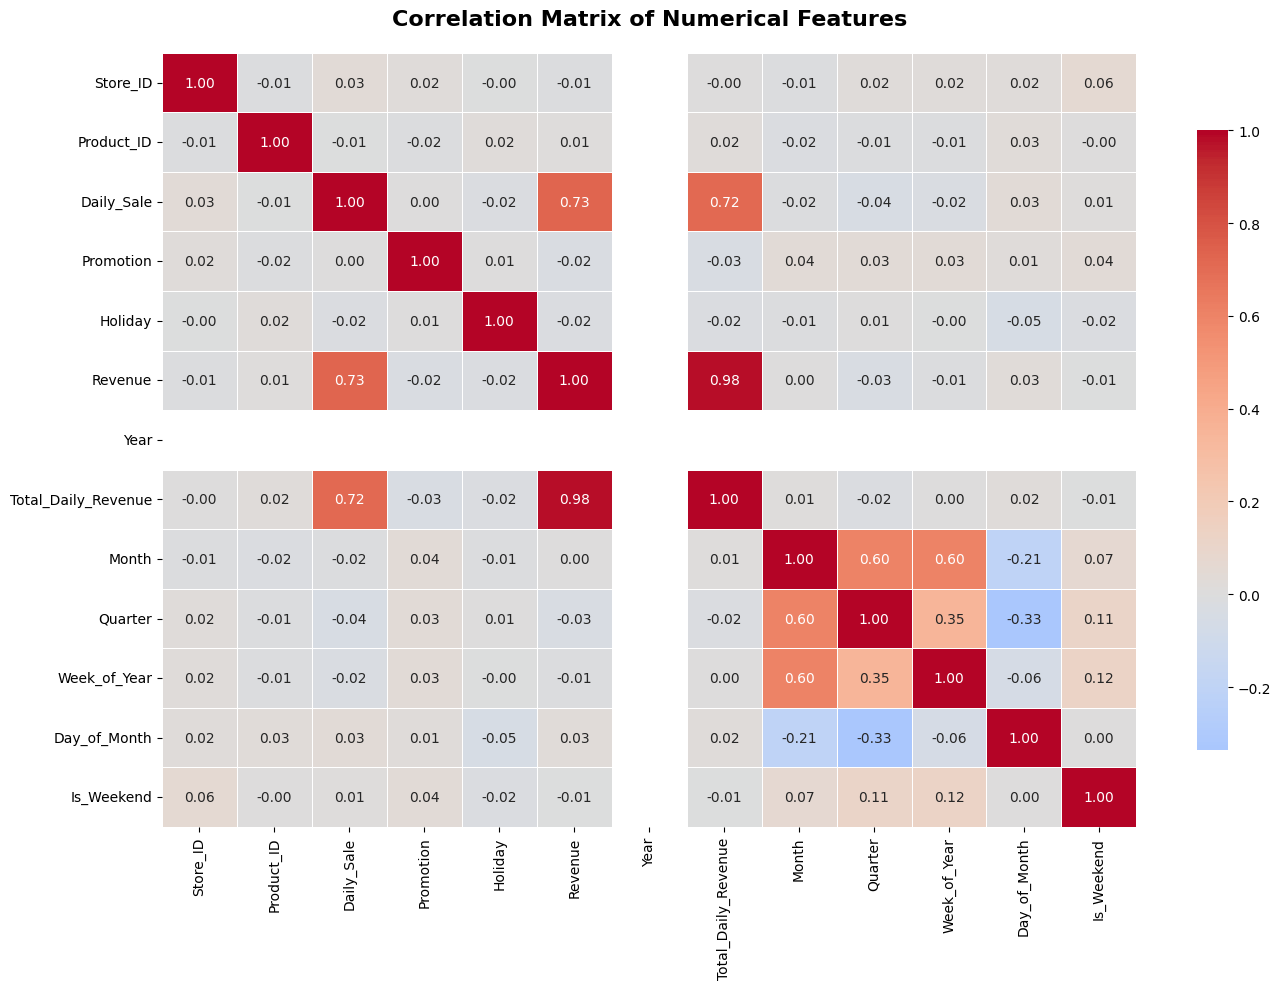

In [31]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [34]:
# Install pandasql if needed
!pip install pandasql

from pandasql import sqldf

# Create a function to execute SQL queries
pysqldf = lambda q: sqldf(q, globals())

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 1.4 MB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.1 MB 1.6 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 1.7 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 1.9 MB/s eta 0:00:00
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl siz


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\PANDIT JI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Query 1: Top 10 Performing Stores by Revenue

In [35]:
query1 = """
SELECT 
    Store_ID,
    Store_Size,
    Store_Location_Type,
    COUNT(*) as Total_Transactions,
    SUM(Daily_Sale) as Total_Sales,
    SUM(Revenue) as Total_Revenue,
    AVG(Daily_Sale) as Avg_Daily_Sale,
    AVG(Revenue) as Avg_Revenue
FROM df
GROUP BY Store_ID, Store_Size, Store_Location_Type
ORDER BY Total_Revenue DESC
LIMIT 10
"""

top_stores = pysqldf(query1)
print("Top 10 Performing Stores by Revenue:")
print(top_stores)

Top 10 Performing Stores by Revenue:
   Store_ID Store_Size Store_Location_Type  Total_Transactions  Total_Sales  \
0         1      Small               Rural                  33         9570   
1         3     Medium               Rural                  33         9213   
2         3     Medium            Suburban                  35         8333   
3         5      Large               Urban                  28         7920   
4         1      Large               Urban                  27         8021   
5         4     Medium               Urban                  28         8316   
6         1     Medium            Suburban                  35         9164   
7         2     Medium            Suburban                  27         7357   
8         4      Large               Rural                  28         8008   
9         5      Small            Suburban                  24         7568   

   Total_Revenue  Avg_Daily_Sale  Avg_Revenue  
0      317557.51      290.000000  9622.954848

### Query 2: Sales Performance by Month and Promotion Status

In [36]:
query2 = """
SELECT 
    Month_Name,
    Promotion,
    COUNT(*) as Transaction_Count,
    SUM(Daily_Sale) as Total_Sales,
    AVG(Daily_Sale) as Avg_Sales,
    SUM(Revenue) as Total_Revenue
FROM df
GROUP BY Month_Name, Promotion
ORDER BY Month, Promotion
"""

monthly_promo = pysqldf(query2)
print("Sales Performance by Month and Promotion:")
print(monthly_promo)

Sales Performance by Month and Promotion:
  Month_Name  Promotion  Transaction_Count  Total_Sales   Avg_Sales  \
0    January          0                165        45891  278.127273   
1    January          1                152        41822  275.144737   
2   February          0                140        39140  279.571429   
3   February          1                144        39664  275.444444   
4      March          0                148        40350  272.635135   
5      March          1                154        44214  287.103896   
6      April          0                 43        11484  267.069767   
7      April          1                 54        13790  255.370370   

   Total_Revenue  
0     1314887.77  
1     1189195.80  
2     1145405.09  
3     1130659.05  
4     1218900.80  
5     1269999.92  
6      351758.78  
7      380883.53  


### Query 3: Weekend vs Weekday Performance

In [37]:
query3 = """
SELECT 
    CASE 
        WHEN Is_Weekend = 1 THEN 'Weekend'
        ELSE 'Weekday'
    END as Day_Type,
    COUNT(*) as Total_Transactions,
    SUM(Daily_Sale) as Total_Sales,
    AVG(Daily_Sale) as Avg_Sales,
    SUM(Revenue) as Total_Revenue,
    AVG(Revenue) as Avg_Revenue
FROM df
GROUP BY Is_Weekend
"""

weekend_analysis = pysqldf(query3)
print("Weekend vs Weekday Performance:")
print(weekend_analysis)

Weekend vs Weekday Performance:
  Day_Type  Total_Transactions  Total_Sales   Avg_Sales  Total_Revenue  \
0  Weekday                 705       194203  275.465248     5655416.12   
1  Weekend                 295        82152  278.481356     2346274.62   

   Avg_Revenue  
0  8021.866837  
1  7953.473288  


### Query 4: Best Performing Products

In [38]:
query4 = """
SELECT 
    Product_ID,
    COUNT(*) as Transaction_Count,
    SUM(Daily_Sale) as Total_Sales,
    AVG(Daily_Sale) as Avg_Daily_Sale,
    SUM(Revenue) as Total_Revenue
FROM df
GROUP BY Product_ID
ORDER BY Total_Revenue DESC
LIMIT 10
"""

top_products = pysqldf(query4)
print("Top 10 Products by Revenue:")
print(top_products)

Top 10 Products by Revenue:
   Product_ID  Transaction_Count  Total_Sales  Avg_Daily_Sale  Total_Revenue
0         102                215        59811      278.190698     1731291.80
1         103                212        57801      272.646226     1639340.98
2         104                190        52986      278.873684     1573305.73
3         101                194        53853      277.592784     1536400.35
4         105                189        51904      274.624339     1521351.88


## Regression Modeling for Sales Forecasting

In [39]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

### Data Preparation for Modeling

In [40]:
# Prepare the data for modeling
df_model = df.copy()

# Encode categorical variables
le_size = LabelEncoder()
le_location = LabelEncoder()
le_day = LabelEncoder()
le_season = LabelEncoder()

df_model['Store_Size_Encoded'] = le_size.fit_transform(df_model['Store_Size'])
df_model['Location_Encoded'] = le_location.fit_transform(df_model['Store_Location_Type'])
df_model['Day_Encoded'] = le_day.fit_transform(df_model['Day_of_Week'])
df_model['Season_Encoded'] = le_season.fit_transform(df_model['Season'])

# Select features for the model
feature_cols = ['Store_ID', 'Product_ID', 'Promotion', 'Holiday', 'Store_Size_Encoded', 
                'Location_Encoded', 'Day_Encoded', 'Month', 'Quarter', 'Is_Weekend', 
                'Season_Encoded', 'Week_of_Year', 'Day_of_Month']

X = df_model[feature_cols]
y = df_model['Daily_Sale']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nFeatures used:", feature_cols)

Training set size: (800, 13)
Test set size: (200, 13)

Features used: ['Store_ID', 'Product_ID', 'Promotion', 'Holiday', 'Store_Size_Encoded', 'Location_Encoded', 'Day_Encoded', 'Month', 'Quarter', 'Is_Weekend', 'Season_Encoded', 'Week_of_Year', 'Day_of_Month']


### Model Training and Evaluation

In [41]:
# Dictionary to store models and their performance
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print('='*50)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    # Store results
    results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'predictions': y_pred_test
    }
    
    # Print results
    print(f"\nTraining Performance:")
    print(f"  R² Score: {train_r2:.4f}")
    print(f"  RMSE: {train_rmse:.2f}")
    print(f"  MAE: {train_mae:.2f}")
    
    print(f"\nTest Performance:")
    print(f"  R² Score: {test_r2:.4f}")
    print(f"  RMSE: {test_rmse:.2f}")
    print(f"  MAE: {test_mae:.2f}")


Training Linear Regression...

Training Performance:
  R² Score: 0.0143
  RMSE: 130.17
  MAE: 113.14

Test Performance:
  R² Score: -0.0453
  RMSE: 139.62
  MAE: 123.99

Training Random Forest...

Training Performance:
  R² Score: 0.8438
  RMSE: 51.82
  MAE: 43.88

Test Performance:
  R² Score: -0.1029
  RMSE: 143.42
  MAE: 123.54

Training Gradient Boosting...

Training Performance:
  R² Score: 0.2601
  RMSE: 112.77
  MAE: 96.40

Test Performance:
  R² Score: -0.1278
  RMSE: 145.03
  MAE: 125.91


### Model Comparison


Model Performance Comparison:
            Model  Train R²   Test R²  Train RMSE  Test RMSE  Train MAE   Test MAE
Linear Regression  0.014271 -0.045295  130.167949 139.622538 113.142599 123.990801
    Random Forest  0.843764 -0.102940   51.822242 143.420745  43.880289 123.538038
Gradient Boosting  0.260140 -0.127782  112.771663 145.026924  96.402635 125.905905


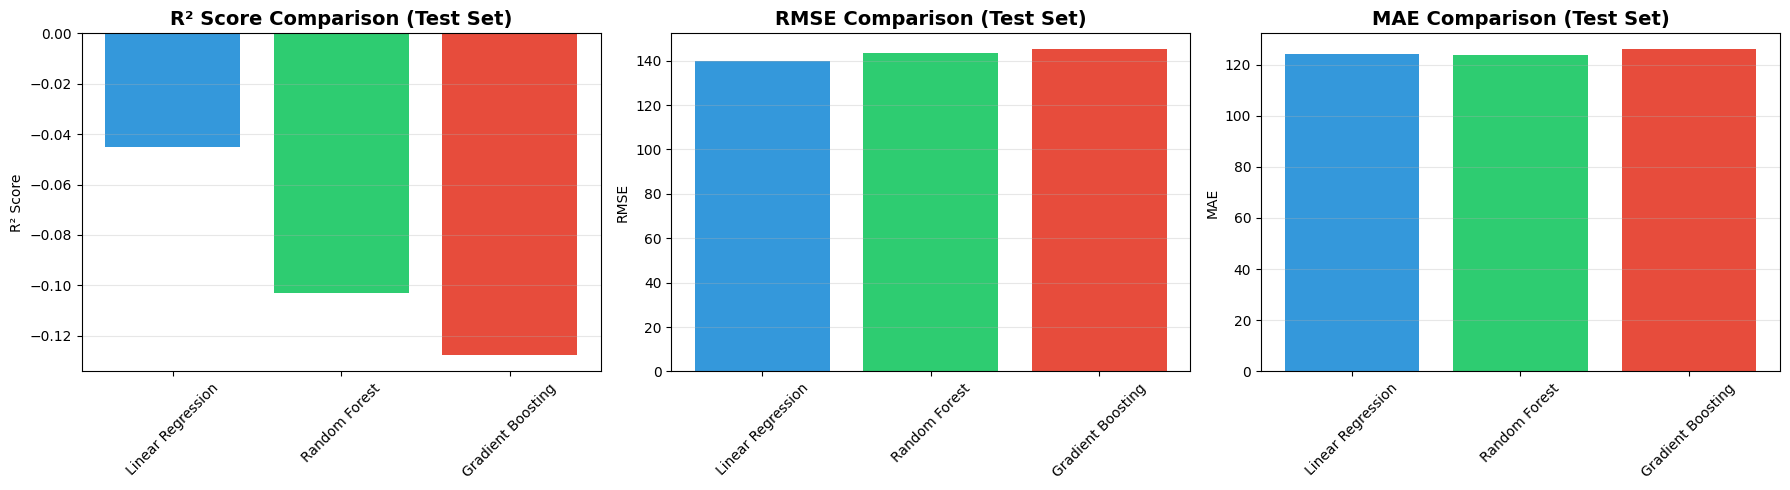

In [42]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['train_r2'] for m in results.keys()],
    'Test R²': [results[m]['test_r2'] for m in results.keys()],
    'Train RMSE': [results[m]['train_rmse'] for m in results.keys()],
    'Test RMSE': [results[m]['test_rmse'] for m in results.keys()],
    'Train MAE': [results[m]['train_mae'] for m in results.keys()],
    'Test MAE': [results[m]['test_mae'] for m in results.keys()]
})

print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score comparison
axes[0].bar(comparison_df['Model'], comparison_df['Test R²'], color=['#3498DB', '#2ECC71', '#E74C3C'])
axes[0].set_title('R² Score Comparison (Test Set)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# RMSE comparison
axes[1].bar(comparison_df['Model'], comparison_df['Test RMSE'], color=['#3498DB', '#2ECC71', '#E74C3C'])
axes[1].set_title('RMSE Comparison (Test Set)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RMSE')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# MAE comparison
axes[2].bar(comparison_df['Model'], comparison_df['Test MAE'], color=['#3498DB', '#2ECC71', '#E74C3C'])
axes[2].set_title('MAE Comparison (Test Set)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('MAE')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Feature Importance Analysis


Feature Importance (Random Forest):
               Feature  Importance
12        Day_of_Month    0.199932
1           Product_ID    0.136011
0             Store_ID    0.122436
11        Week_of_Year    0.116001
6          Day_Encoded    0.106001
4   Store_Size_Encoded    0.088028
5     Location_Encoded    0.076194
2            Promotion    0.050773
3              Holiday    0.046654
7                Month    0.023197
9           Is_Weekend    0.020264
10      Season_Encoded    0.010502
8              Quarter    0.004007


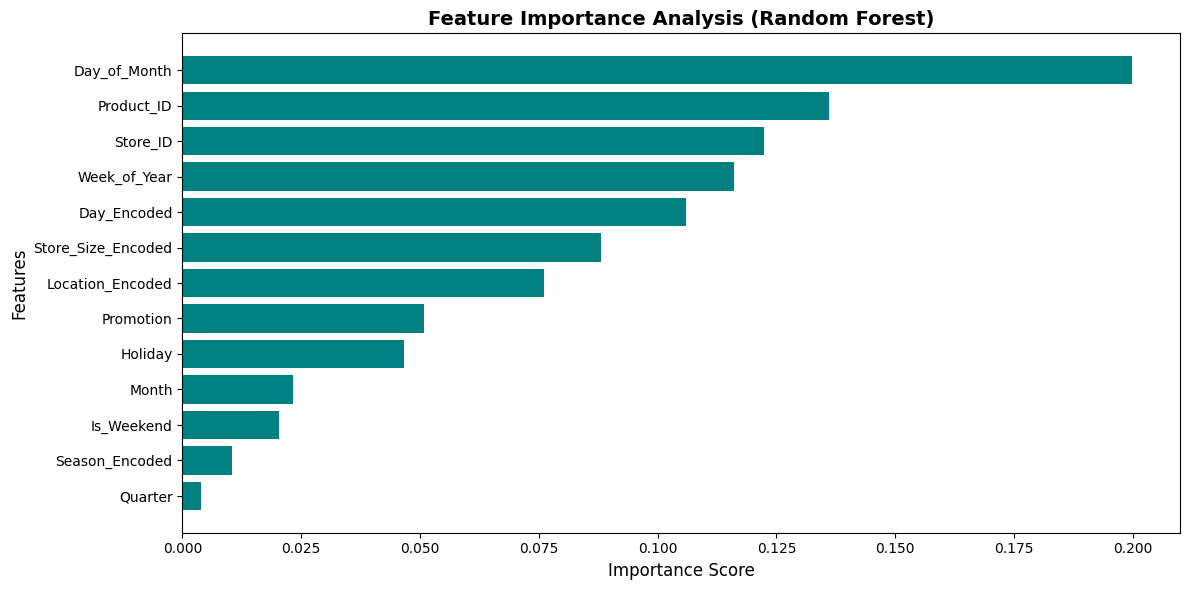

In [43]:
# Feature importance from Random Forest
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance Analysis (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Predictions Visualization

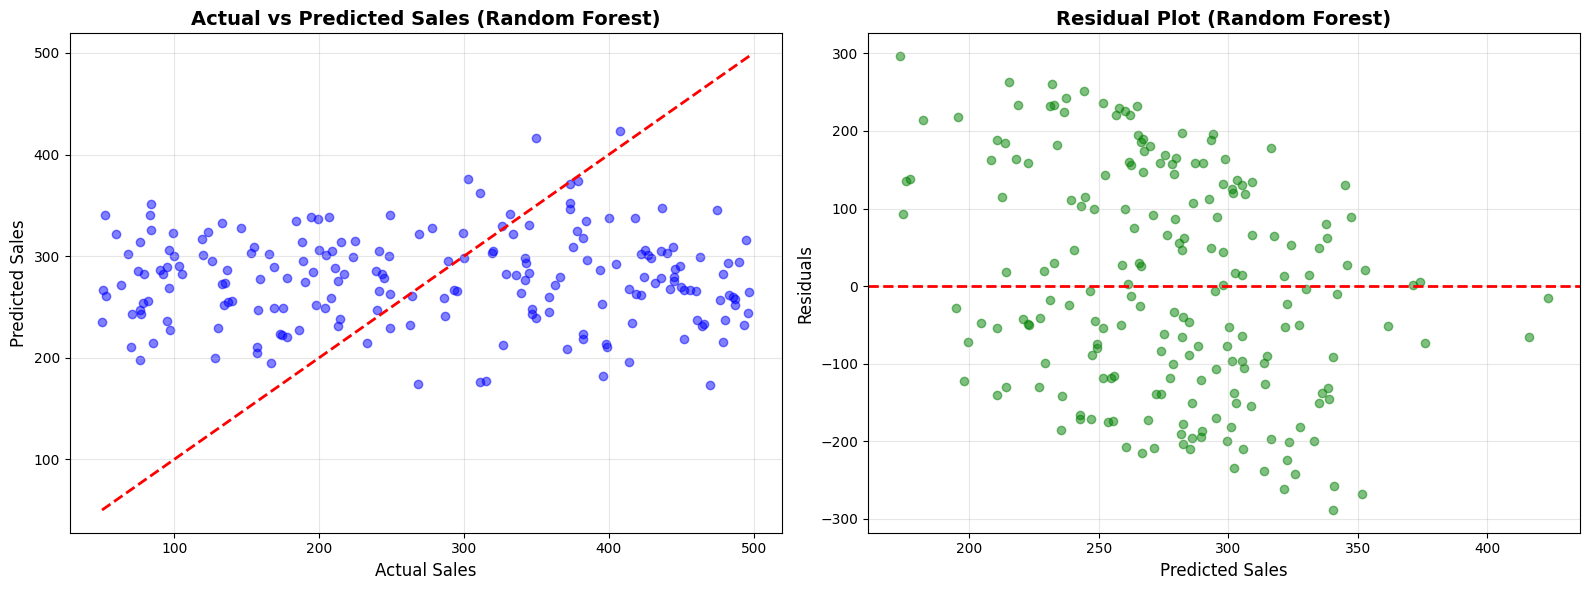

In [44]:
# Actual vs Predicted plot for the best model (Random Forest)
best_model_name = 'Random Forest'
best_predictions = results[best_model_name]['predictions']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(y_test, best_predictions, alpha=0.5, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Sales', fontsize=12)
axes[0].set_ylabel('Predicted Sales', fontsize=12)
axes[0].set_title(f'Actual vs Predicted Sales ({best_model_name})', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Residual plot
residuals = y_test - best_predictions
axes[1].scatter(best_predictions, residuals, alpha=0.5, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Sales', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title(f'Residual Plot ({best_model_name})', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Time Series Forecasting (ARIMA/Prophet)

### Prepare Time Series Data

Time Series Data Shape: (100, 1)

First few rows:
            Daily_Sale
Date                  
2023-01-01        1943
2023-01-02        2746
2023-01-03        2788
2023-01-04        2413
2023-01-05        2479


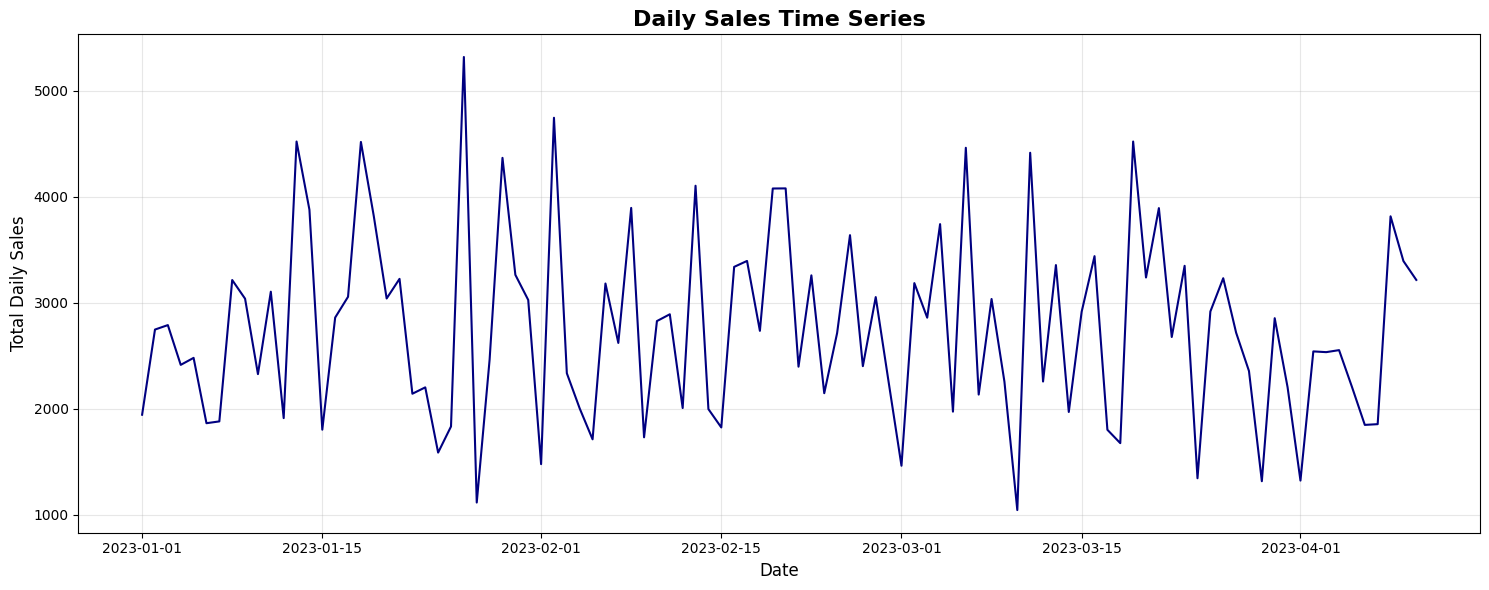

In [45]:
# Aggregate sales by date for time series analysis
ts_data = df.groupby('Date')['Daily_Sale'].sum().reset_index()
ts_data = ts_data.sort_values('Date')
ts_data.set_index('Date', inplace=True)

print("Time Series Data Shape:", ts_data.shape)
print("\nFirst few rows:")
print(ts_data.head())

# Plot the time series
plt.figure(figsize=(15, 6))
plt.plot(ts_data.index, ts_data['Daily_Sale'], color='navy', linewidth=1.5)
plt.title('Daily Sales Time Series', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Daily Sales', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Prophet Forecasting Model

In [46]:
# Install Prophet if needed
# !pip install prophet

try:
    from prophet import Prophet
    
    # Prepare data for Prophet
    prophet_df = ts_data.reset_index()
    prophet_df.columns = ['ds', 'y']
    
    # Initialize and fit the model
    print("Training Prophet model...")
    model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
    model.fit(prophet_df)
    
    # Make future predictions (30 days ahead)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)
    
    # Plot forecast
    fig1 = model.plot(forecast, figsize=(15, 6))
    plt.title('Sales Forecast using Prophet', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Plot components
    fig2 = model.plot_components(forecast, figsize=(15, 10))
    plt.tight_layout()
    plt.show()
    
    print("\n✓ Prophet model trained successfully!")
    print(f"\nForecast for next 30 days:")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))
    
except ImportError:
    print("Prophet library not installed. Install it using: pip install prophet")
except Exception as e:
    print(f"Error: {e}")

Prophet library not installed. Install it using: pip install prophet


# Save The Model

In [47]:
# Save the model
import joblib
joblib.dump(rf_model, 'random_forest_sales_model.pkl')
print("Random Forest model saved as 'random_forest_sales_model.pkl'")

Random Forest model saved as 'random_forest_sales_model.pkl'


# 🌐 Interactive Web Application

The model has been saved successfully! You can now use the **Flask web application** to:

- **View Interactive Dashboard** with real-time analytics
- **Explore Detailed Visualizations** using Plotly charts
- **Make Sales Predictions** using the trained ML model
- **Get Business Insights** and recommendations

## 🚀 How to Run the Flask App

1. **Install Requirements** (if not already installed):
   ```bash
   pip install -r requirements.txt
   ```

2. **Start the Application**:
   - **Option 1**: Double-click `run_app.bat` (Windows)
   - **Option 2**: Run in terminal: `python app.py`

3. **Open in Browser**:
   - Navigate to: `http://localhost:5000`

## 📋 Features Available

- ✅ Interactive Dashboard with KPIs
- ✅ Advanced Analytics & Visualizations
- ✅ ML-Powered Sales Predictions
- ✅ Business Insights & Recommendations
- ✅ Responsive Design for All Devices

**Note**: Make sure the model file `random_forest_sales_model.pkl` exists before running the Flask app!